<a href="https://colab.research.google.com/github/labudzki/BasicModelsofBiologicalNetworks/blob/main/model_of_MAPK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model of MAPK oscillations

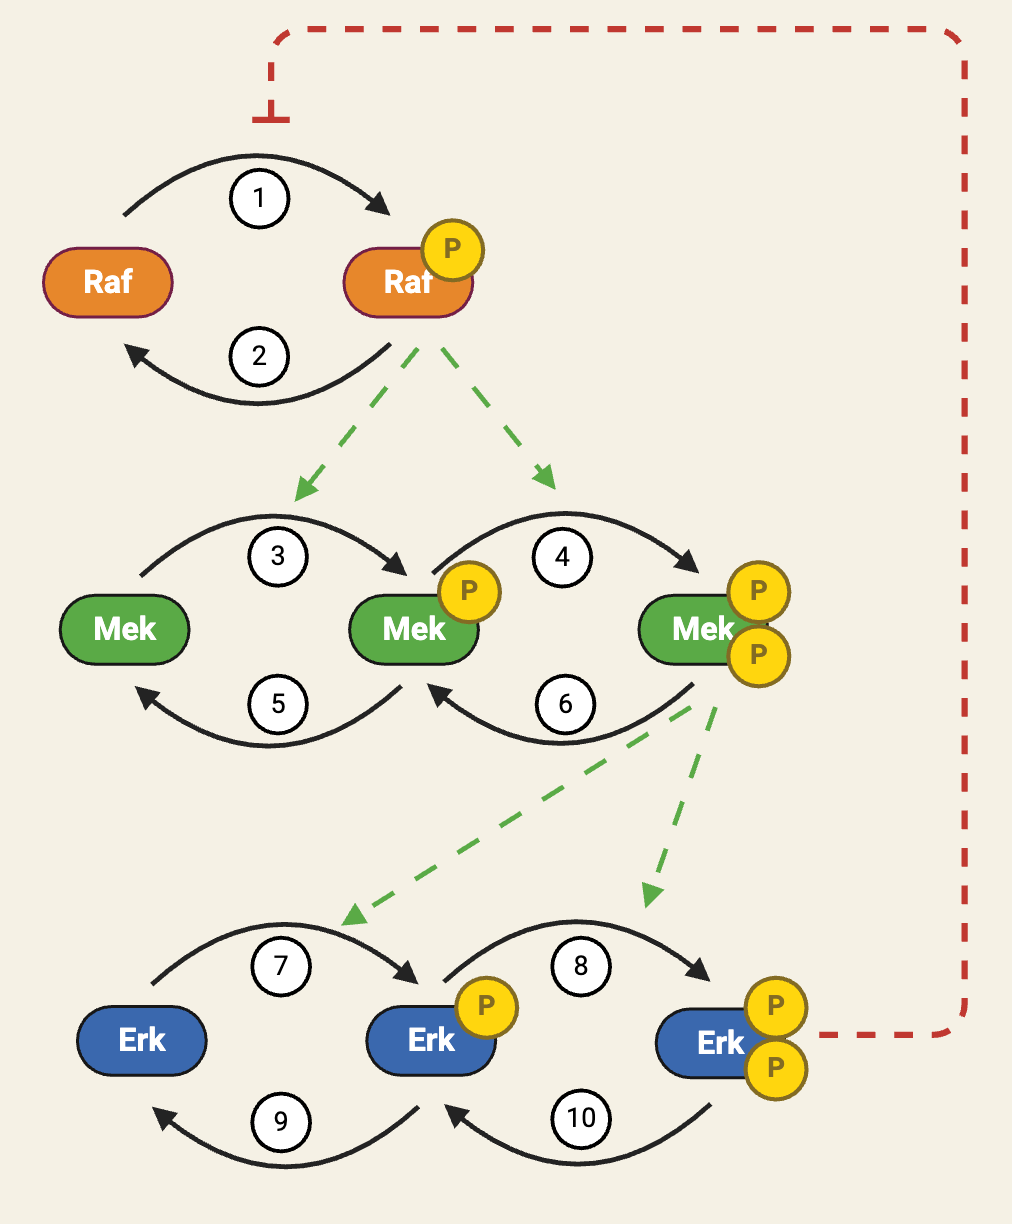

You will implement the model of the cell cycle started in class. You are free to do the modelling choices you find pertinent.

Consider for the kinetics: 
- Irreversible enzyme kinetics
- RAFP is the enzyme that catalyzes reaction 3 and 4
- MEKPP is the enzyme that catalyzes reaction 7 and 8
- Reactions 2, 5, 6, 9 and 10 are catalysed by different phosphatases.
- ERKPP inhibits reaction 1
- All enzymes monomeric

Simulate the model and see if you can get the oscillations (as seen on the figure below).
You will need to try some initial concentrations and parameter values.

Finally if you can check your answers agains the model described on the original paper: https://doi.org/10.1046/j.1432-1327.2000.01197.x

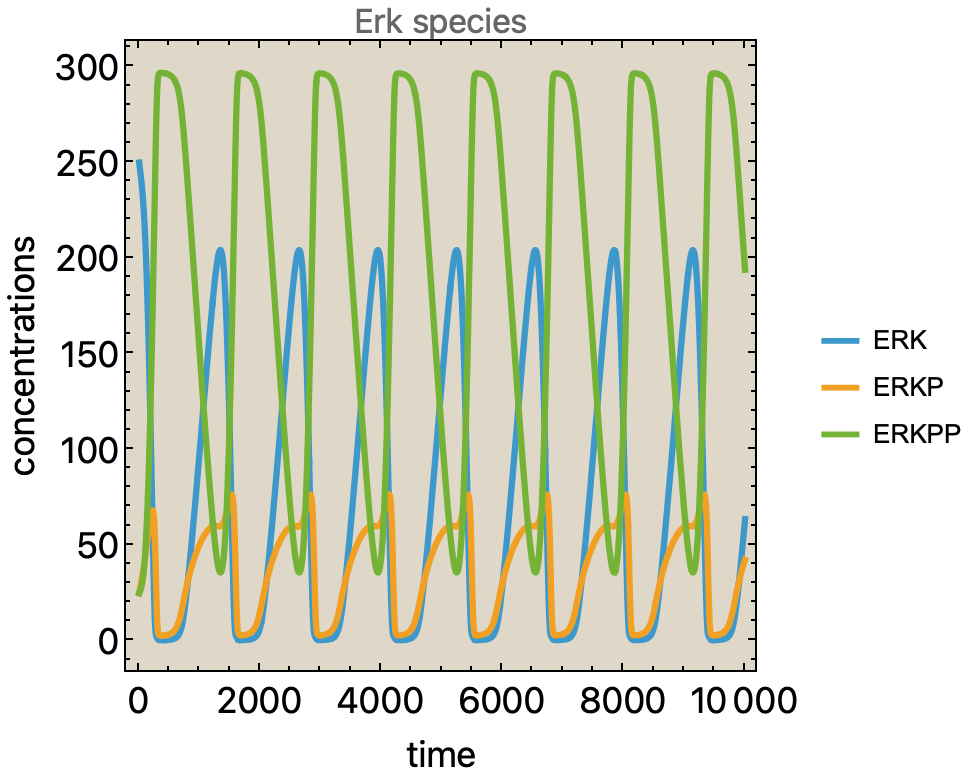

In [1]:
!pip install pysces

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.5 MB/s eta 0:00:00


In [2]:
from google.colab import output
output.enable_custom_widget_manager()

import pysces
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'headless' is currently running

PySCeS defaults to matplotlib's TKagg backend if not specified                          in the user configuration file, set "matplotlib_backend = <backend>" 
Matplotlib interface loaded (pysces.plt.m)
Pitcon routines available
NLEQ2 routines available
INFO: libSBML not installed, SBML support not available.
You are using NumPy (1.26.4) with SciPy (1.13.1)
RateChar is available
INFO: Parallel scanner not available

PySCeS environment
******************
pysces.model_dir = /root/Pysces/psc
pysces.output_dir = /root/Pysces


***********************************************************************
* Welcome to PySCeS (1.2.2) - Python Simulator for Cellular Systems   *
*                http://pysces.sourceforge.net                        *
* Copyright(C) B.G. Olivier, J.M. Rohwer, J.-H.S. Hofmeyr, 2004-2024  *
* Triple-J Group for Molecular Cell Physiology                        *
* 

In [5]:
model_description = '''

r1:
raf + p = rafp
(V1 * raf/K_RAF)/((1 + raf/K_RAF)*(1 + erkpp/K_ERKPP))

r2:
rafp = raf + p
(V2 * rafp/K_RAFP)/(1 + rafp/K_RAFP)

r3:
mek + p = mekp
(k3 * rafp * mek/K_MEK)/(1 + mek/K_MEK)

r4:
mekp + p = mekpp
(k4 * rafp * mekp/K_MEKP)/(1 + mekp/K_MEKP)

r5:
mekp = mek + p
(V5 * mekp/K_MEKP)/(1 + mekp/K_MEKP)

r6:
mekpp = mekp + p
(V6 * mekpp/K_MEKPP)/(1 + mekpp/K_MEKPP)

r7:
erk + p = erkp
(k7 * mekpp * erk/K_ERK)/(1 + erk/K_ERK)

r8:
erkp + p = erkpp
(k8 * mekpp * erkp/K_ERKP)/(1 + erkp/K_ERKP)

r9:
erkp = erk + p
(V9 * erkp/K_ERKP)/(1 + erkp/K_ERKP)

r10:
erkpp = erkp + p
(V10 * erkpp/K_ERKPP)/(1 + erkpp/K_ERKPP)

# Parameters
V1 = 2.5
V2 = 0.25
k3 = 0.025
k4 = 0.025
V6 = 0.75
V5 = 0.75
k7 = 0.025
k8 = 0.025
V10 = 0.5
V9 = 0.5
K_RAF = 10
K_RAFP = 8
K_ERK = 15
K_ERKP = 15
K_ERKPP = 15
K_MEK = 15
K_MEKP = 15
K_MEKPP = 15

# Initial concentrations
p = 100000
raf = 250
rafp = 70
mek = 250
mekp = 70
mekpp = 25
erk = 250
erkp = 70
erkpp = 25
'''

Assuming extension is .psc
Using model directory: /root/Pysces/psc
Using file: my_model.psc
/root/Pysces/psc/orca/my_model.psc loading ..... 
Parsing file: /root/Pysces/psc/orca/my_model.psc
Info: No reagents have been fixed
 
Calculating L matrix . . . . . . . . .  done.
Calculating K matrix . . . . . . . . . . .  done.
 


/usr/local/lib/python3.11/dist-packages/pysces/PyscesModel.py:4058: ODEintWarning: Integration successful.
  sim_res, infodict = scipy.integrate.odeint(


LSODA time for 100000 points: 4.737213373184204


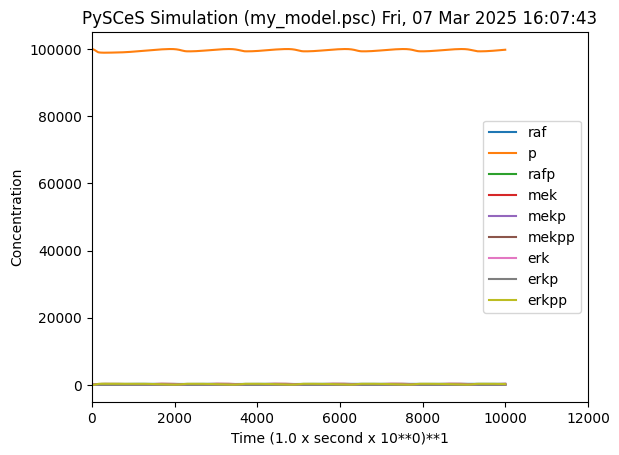

In [9]:
model = pysces.model('my_model', loader='string', fString=model_description)
model.doSim(end=10000, points = 100000)
model.SimPlot()

In [10]:
species, labels = model.data_sim.getSpecies(lbls=True)
result = pd.DataFrame(species, columns=[labels])
result

,Time,raf,p,rafp,mek,mekp,mekpp,erk,erkp,erkpp
0,0.000000,250.000000,100000.000000,70.000000,250.000000,70.000000,25.000000,250.000000,70.000000,25.000000
1,0.100001,249.932316,99999.693410,70.067684,249.896592,70.006128,25.097280,249.982099,69.997585,25.020316
2,0.200002,249.864681,99999.386222,70.135319,249.793029,70.012336,25.194634,249.963969,69.995209,25.040823
3,0.300003,249.797095,99999.078434,70.202905,249.689312,70.018626,25.292062,249.945609,69.992871,25.061520
4,0.400004,249.729559,99998.770047,70.270441,249.585440,70.024996,25.389563,249.927019,69.990574,25.082408
...,...,...,...,...,...,...,...,...,...,...
99995,9999.599996,311.742550,99756.648219,8.257450,326.583816,15.666214,2.749970,60.865058,44.341708,239.793235
99996,9999.699997,311.740987,99756.740063,8.259013,326.602382,15.648722,2.748896,60.896905,44.351780,239.751314
99997,9999.799998,311.739422,99756.831886,8.260578,326.620922,15.631255,2.747823,60.928757,44.361850,239.709393
99998,9999.899999,311.737857,99756.923688,8.262143,326.639438,15.613813,2.746749,60.960612,44.371917,239.667470


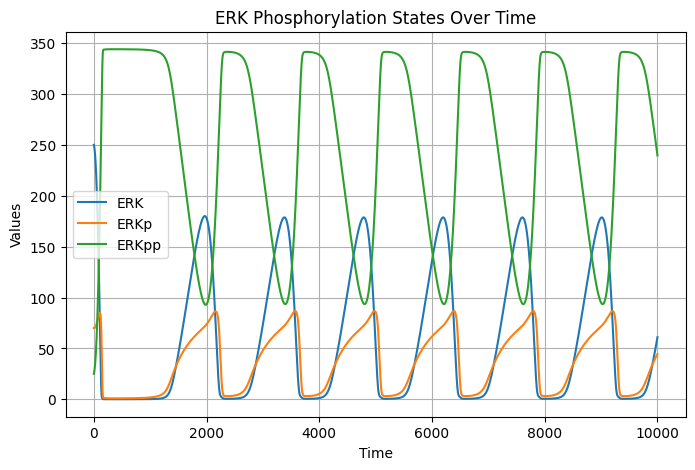

In [11]:
 time = result.iloc[:,0]
 erk = result.iloc[:,7]
 erkp = result.iloc[:,8]
 erkpp = result.iloc[:,9]

 # Plot data
plt.figure(figsize=(8, 5))
plt.plot(result.iloc[:, 0], result.iloc[:, 7], label="ERK")
plt.plot(result.iloc[:, 0], result.iloc[:, 8], label="ERKp")
plt.plot(result.iloc[:, 0], result.iloc[:, 9], label="ERKpp")

# Labels and legend
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("ERK Phosphorylation States Over Time")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()